<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head() #population and profit in the unit of 10k.

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info() #to get more insight on the data
#97 entries, so data for 97 city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

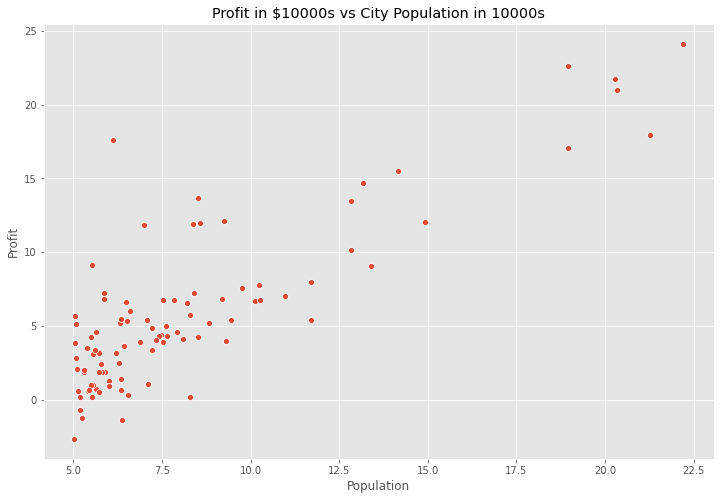

In [5]:
#visualising the data using seaborn
# we are interested in finding out the profit, so profit is y axis
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = data)
ax.set_title('Profit in $10000s vs City Population in 10000s');

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def cost_func(x,y, theta):
    m = len(y)
    y_pred = x.dot(theta) # this is the hypothesis # dot is the dot product
    error = (y_pred - y) ** 2
    
    return 1 / (2*m) * np.sum(error)

In [7]:
m = data.Population.values.size
x = np.append(np.ones((m, 1)), data.Population.values.reshape(m,1), axis =1) #reshaping so matrices multiplication is valid
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_func(x, y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [11]:
# theta sub j is parameterized by the vector theta not x/y.
def gradient_descent(x,y,theta, alpha, iterations): #alpha is the learning rate
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta = theta - alpha * 1/m * error
        costs.append(cost_func(x,y,theta))
        
    return theta, costs

In [12]:
theta, costs = gradient_descent(x,y,theta,alpha= 0.01, iterations = 2000) #if the learning rate is too large the cost function might diverge
print('h(x) = {} + {}x1'.format(str(round(theta[0,0], 2)), str(round(theta[1,0], 2))))

h(x) = -3.79 + 1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
theta_0 = np.linspace(-10,10,100) #range of theta_0
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_func(x,y,t)

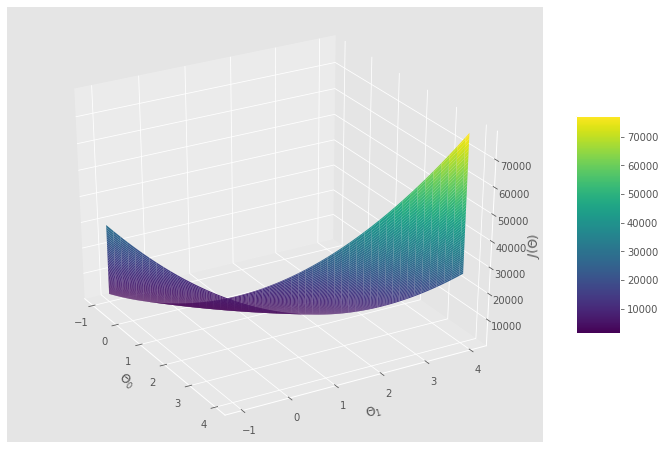

In [15]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surface = ax.plot_surface(theta_1, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surface, shrink = 0.5, aspect = 5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,330)

plt.show()
#the graph shows a global minimum which is the optimum value for the parameters theta_0 and theta_1 
#and each step in the gradient descent steps closer to this minimum.

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

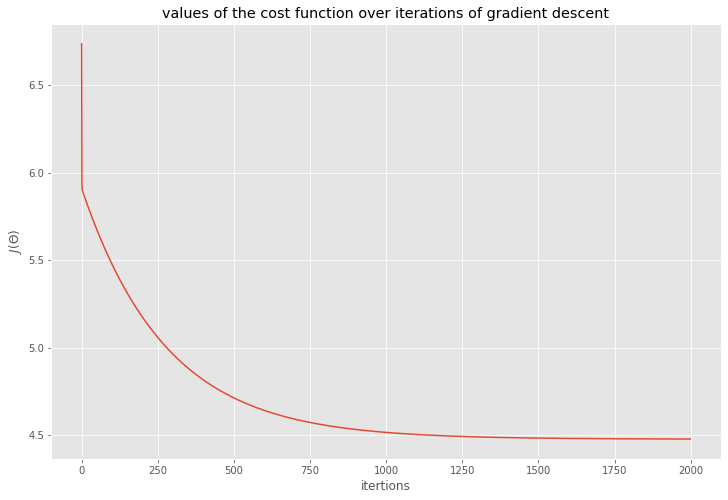

In [16]:
plt.plot(costs)
plt.xlabel('itertions')
plt.ylabel('$J(\Theta)$')
plt.title("values of the cost function over iterations of gradient descent");

### Task 8: Training Data with Linear Regression Fit
---

In [17]:
theta.shape

(2, 1)

In [18]:
theta

array([[-3.78806857],
       [ 1.18221277]])

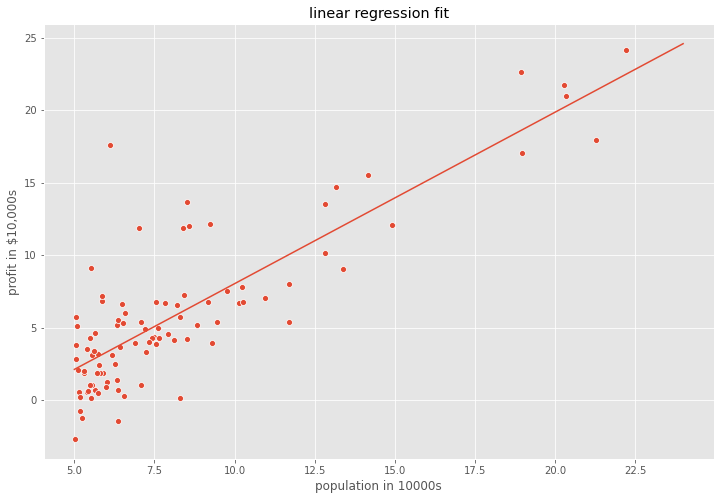

In [19]:
theta = np.squeeze(theta) #to get rid of an extra dimension
sns.scatterplot(x = 'Population', y = 'Profit', data = data)

x_value = [x for x in range(5, 25)] #the range depends on our data range
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('population in 10000s')
plt.ylabel('profit in $10,000s')
plt.title('linear regression fit');

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [20]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [21]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print('For a Population of 40,000 people, the model predicts a profit of $' + str(round(y_pred_1, 0)))

For a Population of 40,000 people, the model predicts a profit of $9408.0


In [22]:
y_pred_2 = predict(np.array([1, 9]), theta) * 10000
print('For a Population of 90,000 people, the model predicts a profit of $' + str(round(y_pred_2, 0)))

For a Population of 90,000 people, the model predicts a profit of $68518.0
